In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [3]:
from PlottingFunction import lda_1Dplot, plotModel, data_1Dplot

In [4]:
from Classification import model_fit, plot_confusion_matrix

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
X = heart.drop(['num'],axis=1).copy()
Y = heart.num.copy()

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=144, shuffle=True, stratify=Y) 

In [9]:
SC = StandardScaler()
X_scaled = SC.fit_transform(X)

In [10]:
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.33, random_state=144, shuffle=True, stratify=Y) 

In [11]:
glm = LogisticRegression(max_iter = 1e7)
model_fit(glm, X_train, X_test, Y_train, Y_test)

LogisticRegression
Train score is :0.647
Test score is :0.668
[0.61490683 0.64596273 0.5875    ]
[0.625      0.58227848 0.58227848]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
glm = LogisticRegression(max_iter = 1e7)
model_fit(glm, X_train_scaled, X_test_scaled, Y_train, Y_test)

LogisticRegression
Train score is :0.647
Test score is :0.668
[0.59627329 0.63354037 0.6       ]
[0.6375     0.56962025 0.58227848]


In [13]:
print((220+79+2+8+4)/482)
print('1st class accuracy is :' + str(220/482))
print('2nd class accuracy is :' + str(79/482))
print('3rd class accuracy is :' + str(2/482))
print('Goal for 2nd class accuracy is :' + str(140/482))
print('Goal for 3rd class accuracy is :' + str(46/482))
print('Goal for 3rd class accuracy is :' + str(43/482))

0.6493775933609959
1st class accuracy is :0.45643153526970953
2nd class accuracy is :0.16390041493775934
3rd class accuracy is :0.004149377593360996
Goal for 2nd class accuracy is :0.29045643153526973
Goal for 3rd class accuracy is :0.0954356846473029
Goal for 3rd class accuracy is :0.08921161825726141


LogisticRegression


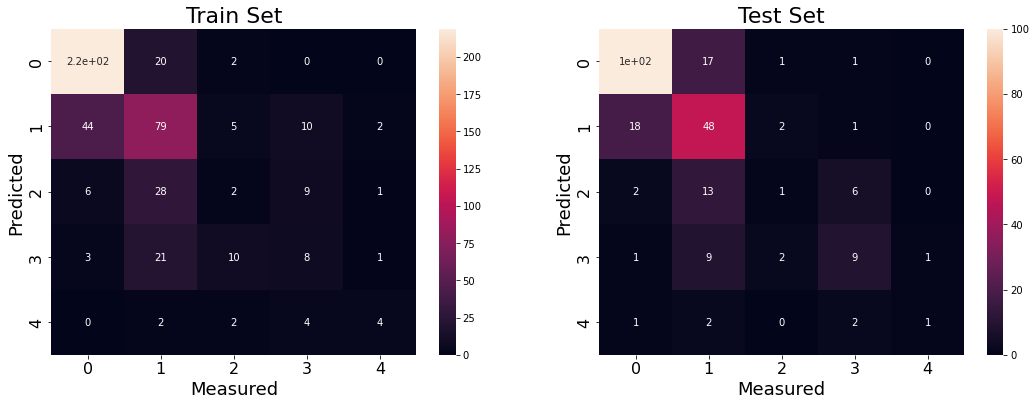

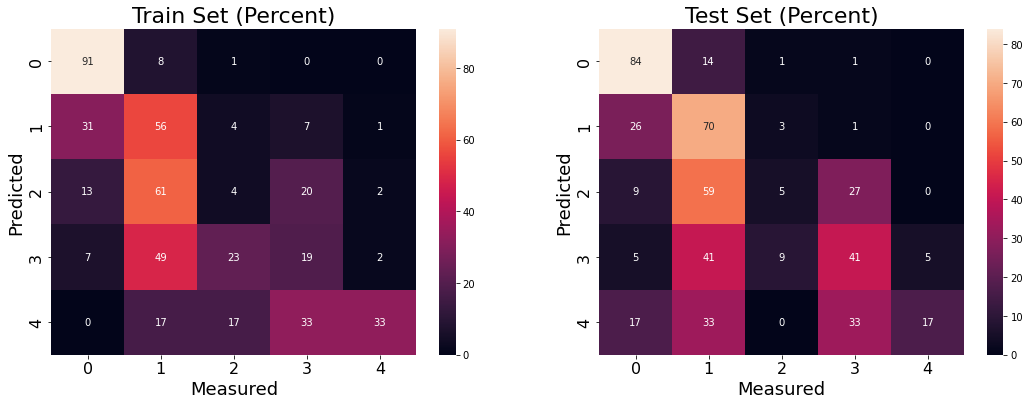

In [14]:
plot_confusion_matrix(glm, X_train_scaled, X_test_scaled, Y_train, Y_test)

In [15]:
dtc = DecisionTreeClassifier()
dtc.set_params(criterion = 'entropy', max_depth = 3, max_features = 5, min_samples_split = 12, random_state = 144)
model_fit(dtc, X_train, X_test, Y_train, Y_test)

DecisionTreeClassifier
Train score is :0.641
Test score is :0.613
[0.62111801 0.63354037 0.58125   ]
[0.5        0.55696203 0.62025316]


In [16]:
dtc = DecisionTreeClassifier()
dtc.set_params(criterion = 'entropy', max_depth = 3, max_features = 6, min_samples_split = 12, random_state = 144)
model_fit(dtc, X_train_scaled, X_test_scaled, Y_train, Y_test)

DecisionTreeClassifier
Train score is :0.641
Test score is :0.639
[0.62732919 0.61490683 0.5625    ]
[0.5125     0.55696203 0.58227848]


DecisionTreeClassifier


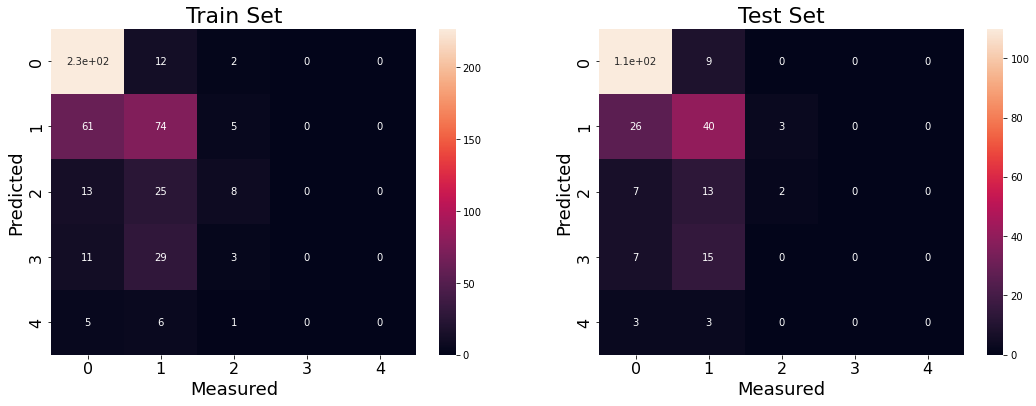

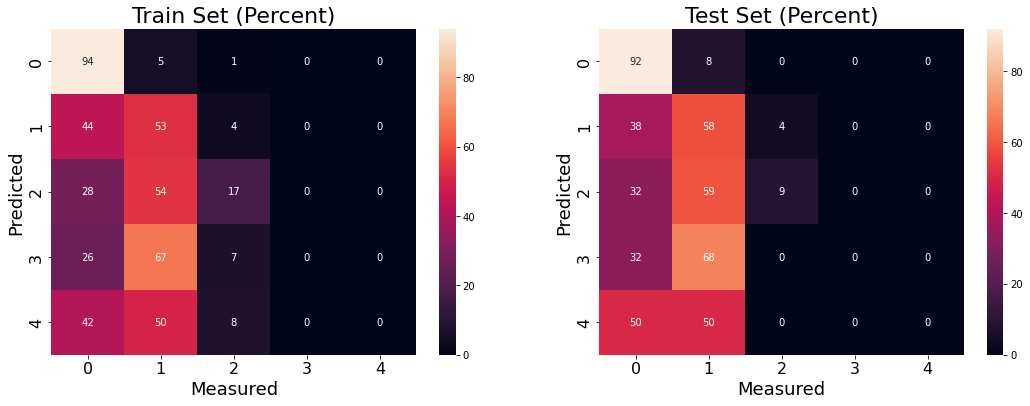

In [17]:
plot_confusion_matrix(dtc, X_train_scaled, X_test_scaled, Y_train, Y_test)

In [18]:
rfc = RandomForestClassifier()
rfc.set_params(criterion='gini', max_depth = 3, max_features = 8, min_samples_split = 10, random_state = 144,
               min_weight_fraction_leaf = 0.01)
model_fit(rfc, X_train, X_test, Y_train, Y_test)

RandomForestClassifier
Train score is :0.67
Test score is :0.639
[0.68322981 0.64596273 0.6125    ]
[0.55       0.60759494 0.70886076]


In [19]:
model_fit(rfc, X_train_scaled, X_test_scaled, Y_train, Y_test)

RandomForestClassifier
Train score is :0.67
Test score is :0.639
[0.68322981 0.64596273 0.6125    ]
[0.55       0.60759494 0.70886076]


RandomForestClassifier


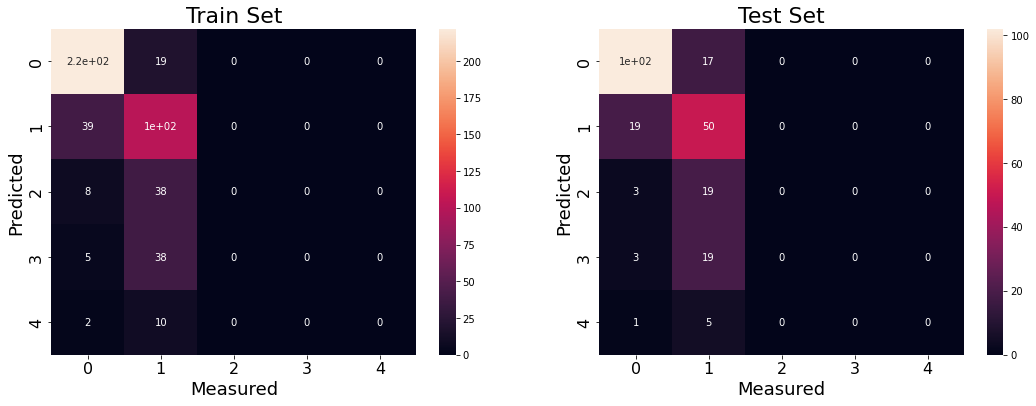

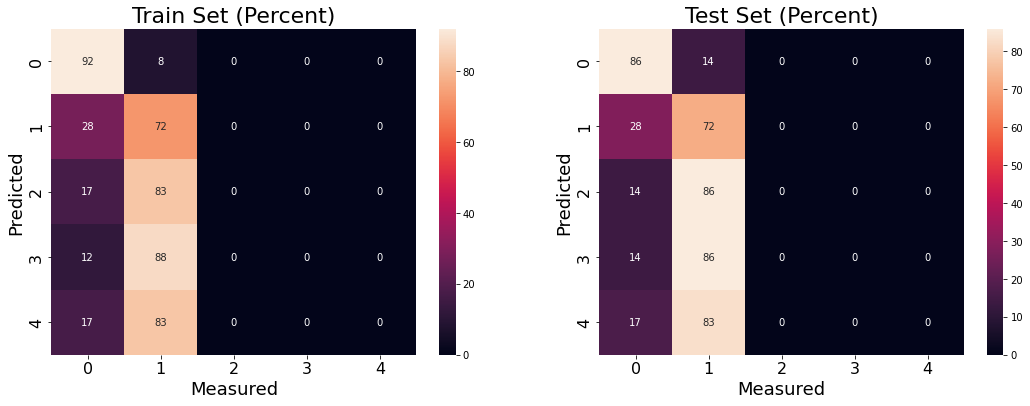

In [20]:
plot_confusion_matrix(rfc, X_train_scaled, X_test_scaled, Y_train, Y_test)

In [21]:
LDA = LinearDiscriminantAnalysis()
model_fit(LDA, X_train, X_test, Y_train, Y_test)

LinearDiscriminantAnalysis
Train score is :0.647
Test score is :0.622
[0.63354037 0.63354037 0.6       ]
[0.6625     0.5443038  0.56962025]


In [22]:
model_fit(rfc, X_train_scaled, X_test_scaled, Y_train, Y_test)

RandomForestClassifier
Train score is :0.67
Test score is :0.639
[0.68322981 0.64596273 0.6125    ]
[0.55       0.60759494 0.70886076]


In [23]:
QDA = QuadraticDiscriminantAnalysis()
QDA.set_params(reg_param = 0.4)
model_fit(QDA, X_train, X_test, Y_train, Y_test)

QuadraticDiscriminantAnalysis
Train score is :0.712
Test score is :0.597
[0.60248447 0.59627329 0.575     ]
[0.5        0.53164557 0.63291139]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-

In [24]:
QDA = QuadraticDiscriminantAnalysis()
QDA.set_params(reg_param = 0.8)
model_fit(QDA, X_train_scaled, X_test_scaled, Y_train, Y_test)

QuadraticDiscriminantAnalysis
Train score is :0.664
Test score is :0.651
[0.60248447 0.60248447 0.55      ]
[0.4375     0.46835443 0.5443038 ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-

In [25]:
GNB = GaussianNB(var_smoothing = 1e-5)
model_fit(GNB, X_train, X_test, Y_train, Y_test)

GaussianNB
Train score is :0.668
Test score is :0.622
[0.62732919 0.64596273 0.625     ]
[0.6        0.5443038  0.60759494]


In [26]:
GNB = GaussianNB(var_smoothing = 1)
model_fit(GNB, X_train_scaled, X_test_scaled, Y_train, Y_test)

GaussianNB
Train score is :0.664
Test score is :0.672
[0.64596273 0.65838509 0.6125    ]
[0.6375     0.60759494 0.64556962]


GaussianNB


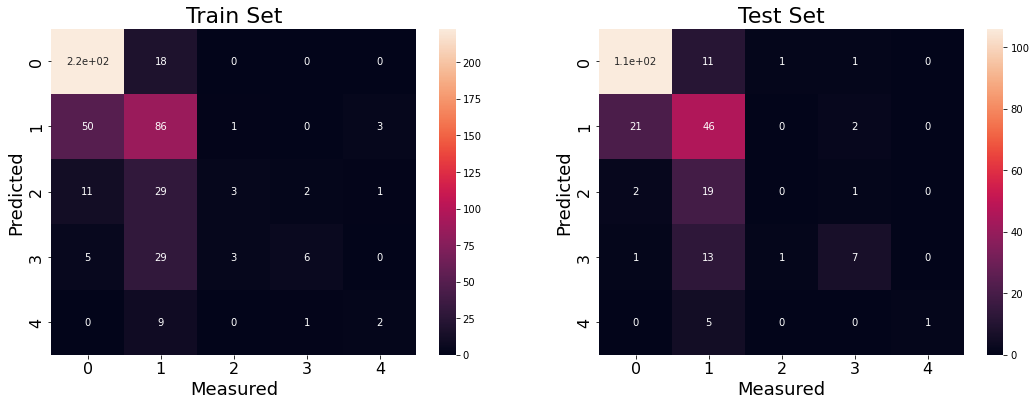

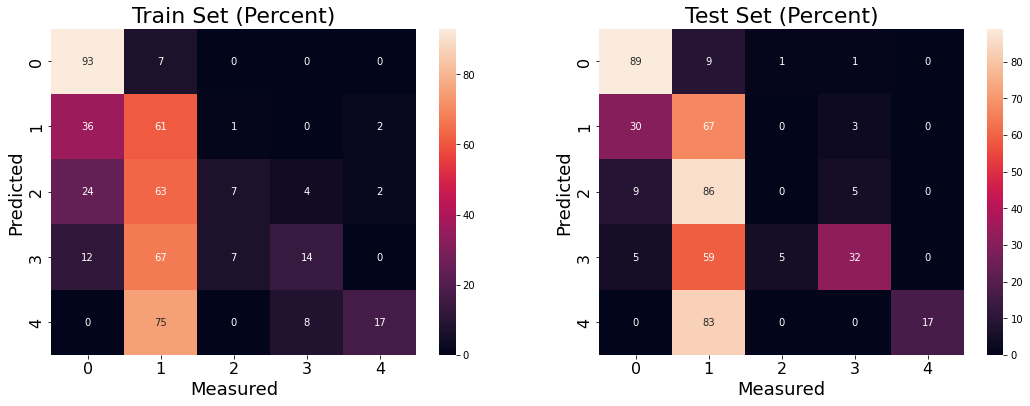

In [27]:
plot_confusion_matrix(GNB, X_train_scaled, X_test_scaled, Y_train, Y_test)

In [28]:
gbc = GradientBoostingClassifier()
gbc.set_params(random_state = 144, n_estimators = 5000, max_features = 5, max_depth = 5, min_samples_split = 25, 
              min_weight_fraction_leaf = 0.05, ccp_alpha = 1e-2)
model_fit(gbc, X_train, X_test, Y_train, Y_test)

GradientBoostingClassifier
Train score is :0.641
Test score is :0.647
[0.65217391 0.67080745 0.59375   ]
[0.625      0.56962025 0.60759494]


In [29]:
gbc.fit(X_train, Y_train)
r2_train = np.round(gbc.score(X_train, Y_train),3)
r2_test  = np.round(gbc.score(X_test, Y_test),3)
print('Train score is :' + str(r2_train))
print('Test score is :' + str(r2_test))

Train score is :0.641
Test score is :0.647


GradientBoostingClassifier


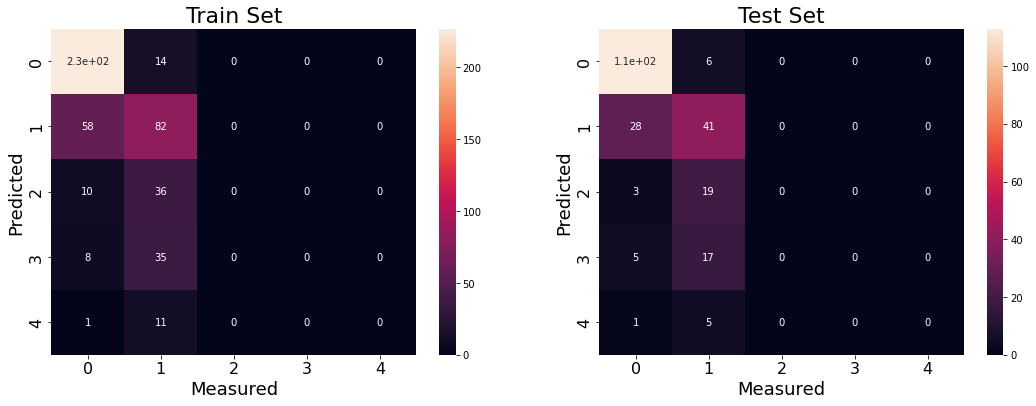

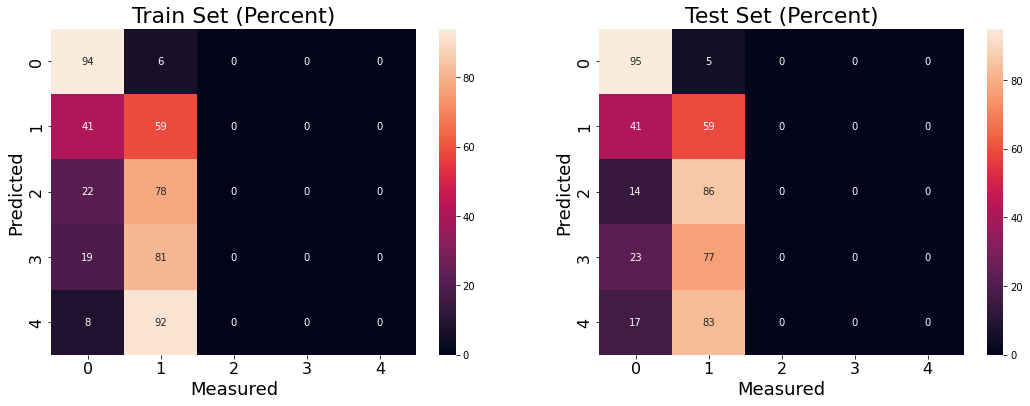

In [30]:
plot_confusion_matrix(gbc, X_train, X_test, Y_train, Y_test)

In [31]:
xgb_cl = XGBClassifier(gamma = 4, max_depth = 10)
xgb_cl.set_params(random_state=144)
model_fit(xgb_cl, X_train, X_test, Y_train, Y_test)

XGBClassifier
Train score is :0.693
Test score is :0.643
[0.62732919 0.65838509 0.58125   ]
[0.6125     0.58227848 0.60759494]


In [32]:
model_fit(xgb_cl, X_train_scaled, X_test_scaled, Y_train, Y_test)

XGBClassifier
Train score is :0.693
Test score is :0.643
[0.62732919 0.66459627 0.58125   ]
[0.6125     0.58227848 0.60759494]


In [33]:
xgb_cl = XGBClassifier(gamma = 4, max_depth = 10)
xgb_cl.set_params(random_state=144)

xgb_cl.fit(X_train, Y_train)
r2_train = np.round(xgb_cl.score(X_train, Y_train),3)
r2_test  = np.round(xgb_cl.score(X_test, Y_test),3)
print('Train score is :' + str(r2_train))
print('Test score is :' + str(r2_test))

Train score is :0.693
Test score is :0.643


XGBClassifier


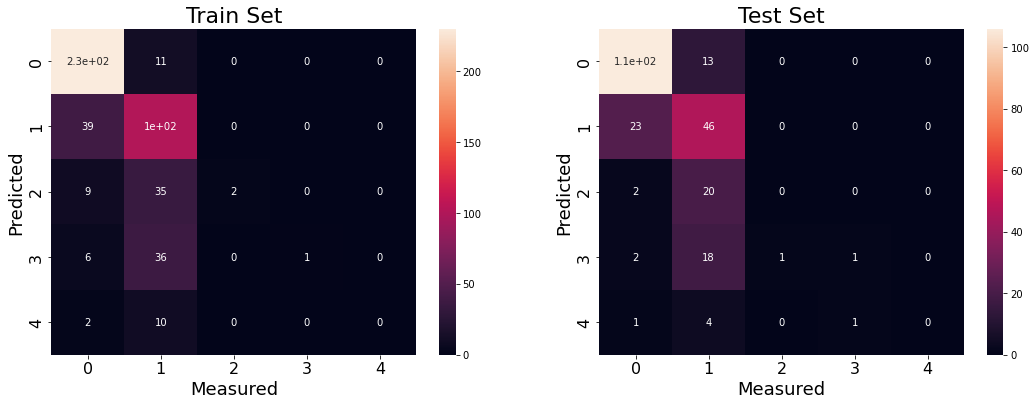

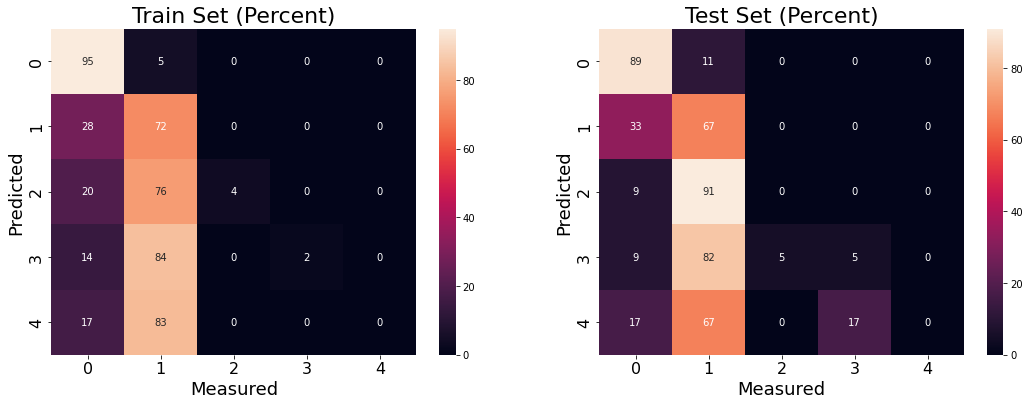

In [34]:
plot_confusion_matrix(xgb_cl, X_train, X_test, Y_train, Y_test)

In [35]:
knn = KNeighborsClassifier(n_neighbors=10)
model_fit(knn, X_train, X_test, Y_train, Y_test)

KNeighborsClassifier
Train score is :0.6
Test score is :0.592
[0.54658385 0.53416149 0.55      ]
[0.5375     0.53164557 0.49367089]


In [36]:
model_fit(knn, X_train_scaled, X_test_scaled, Y_train, Y_test)

KNeighborsClassifier
Train score is :0.668
Test score is :0.668
[0.63354037 0.61490683 0.6125    ]
[0.6625     0.59493671 0.65822785]


KNeighborsClassifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


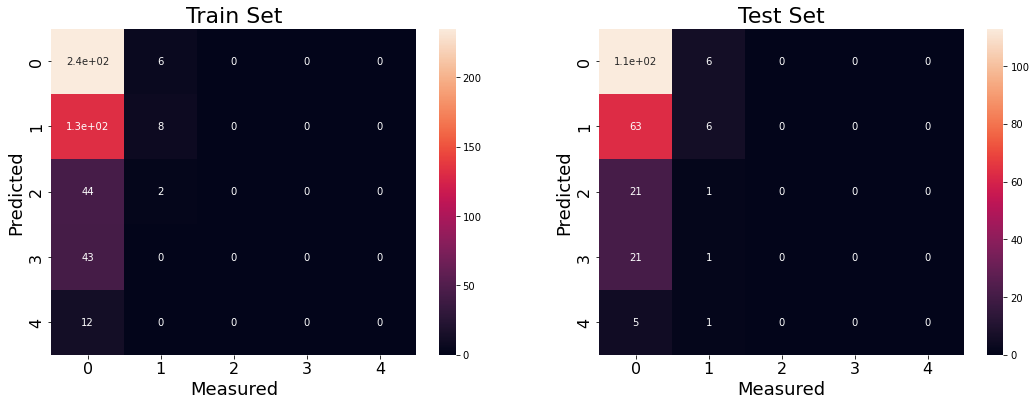

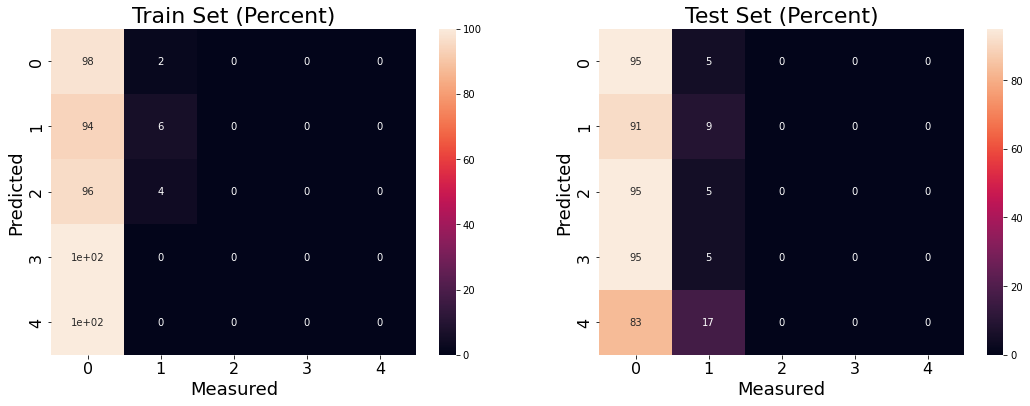

In [37]:
plot_confusion_matrix(knn, X_train, X_test, Y_train, Y_test)

In [38]:
svc = svm.SVC()
svc.set_params(C = 0.05, kernel = 'poly', max_iter = 1e5, degree = 1, probability = True, random_state = 144, gamma = 0.05)
model_fit(svc, X_train, X_test, Y_train, Y_test)

SVC


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Train score is :0.618
Test score is :0.605


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[0.60869565 0.61490683 0.56875   ]
[0.5625     0.58227848 0.53164557]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [39]:
model_fit(svc, X_train_scaled, X_test_scaled, Y_train, Y_test)

SVC
Train score is :0.647
Test score is :0.63
[0.59627329 0.54658385 0.5625    ]
[0.5        0.50632911 0.49367089]
